In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import re
import csv

import os

### Individual Games

Read in data on individual games

In [4]:
# make sure there's a date and csv
meta_re = re.compile('\_(\d{4})-(\d{2})-(\d{2})-(\d*).*(?=csv)', re.DOTALL)

In [5]:
data_dir = '../data_170215/'
game_data = []

for file in os.listdir(data_dir):
    meta_info = set()
    meta_match = meta_re.search(file)
    
    if meta_match:
        meta_info = meta_match.groups()
        date = '-'.join(meta_info[:-1])
        g_id = meta_info[-1]
        
        with open(data_dir + file, 'rb') as infile:
            reader = csv.reader(infile)
            for row in reader:
                if 'Duration' not in row:
                    full_row = row
                    full_row.append(row[((row[0] == row[2]) + 1) / 2])
                    game_data.append([date, g_id] + full_row)
            infile.close()
            

In [6]:
game_data_cols = ['date', 'game_id', 'player1', 'player2', 'winner', 'stripes', 'solids', 'duration', 'loser']
df_games = pd.DataFrame(game_data, columns=game_data_cols)

In [7]:
df_games['date'] = pd.to_datetime(df_games.date)
df_games['duration'] = df_games.duration.astype(float)
df_games['ind'] = 1

In [8]:
df_games = df_games[((df_games.player1 != '') & (df_games.player2 != ''))]

In [9]:
df_games

,date,game_id,player1,player2,winner,stripes,solids,duration,loser,ind
0,2017-01-20,1712,SPM,JRM,SPM,SPM,JRM,8.550000,JRM,1
1,2017-01-26,0815,SPM,JDH,SPM,JDH,SPM,9.750000,JDH,1
2,2017-01-26,1141,JDH,GJZ,GJZ,GJZ,JDH,12.666667,JDH,1
3,2017-01-26,1337,MAG,JDH,MAG,JDH,MAG,13.600000,JDH,1
4,2017-01-26,1624,GJZ,JD,GJZ,JD,GJZ,19.450000,JD,1
5,2017-01-27,1412,JDH,SPM,JDH,JDH,SPM,9.516667,SPM,1
6,2017-01-27,1449,JD,JDH,JDH,JDH,JD,13.850000,JD,1
7,2017-01-27,1518,MKG,MKG2,MKG,MKG2,MKG,7.766667,MKG2,1
8,2017-01-30,1156,SPM,GJZ,GJZ,GJZ,SPM,11.583333,SPM,1
9,2017-01-30,1318,GJZ,JDH,GJZ,GJZ,JDH,10.766667,JDH,1


### Aggregate head-to-head records

Head to head records:

In [70]:
games_h2h_ct = df_games[['winner', 'loser', 'ind']].groupby(['winner', 'loser']).sum().reset_index()
games_h2h = games_h2h_ct.pivot(index='loser', columns='winner', values='ind')

del games_h2h.columns.name
games_h2h.fillna(0, inplace=True)
games_h2h.reset_index(inplace=True)
games_h2h.set_index('loser', drop=True, inplace=True)
games_h2h.index.name = None

#games_h2h

In [71]:
all_players = set(games_h2h_ct.winner.values).union(set(games_h2h_ct.loser.values))

Adjust so that all players are included in both axes

In [72]:
for player in all_players:
    winners = games_h2h.columns
    losers = games_h2h.index.values
    
    if player not in winners:
        games_h2h[player] = 0
    
    if player not in losers:
        games_h2h.loc[player] = list(np.zeros(games_h2h.shape[1]))

In [73]:
games_h2h = games_h2h.reindex_axis(sorted(games_h2h.columns), axis=1)
games_h2h.sort_index(inplace=True)

Add in total wins and losses for each player:

In [74]:
games_h2h['losses'] = games_h2h.sum(axis=1)
games_h2h.loc['wins'] = list(games_h2h.sum(axis=0))[:-1] + [0]

#### Head-to-head heatmap 

See [stackoverflow](http://stackoverflow.com/questions/11917547/how-to-annotate-heatmap-with-text-in-matplotlib) for borrowed code for labeling text. For some reason need to run this (and sorting below as well) twice in order to get correct index ordering.

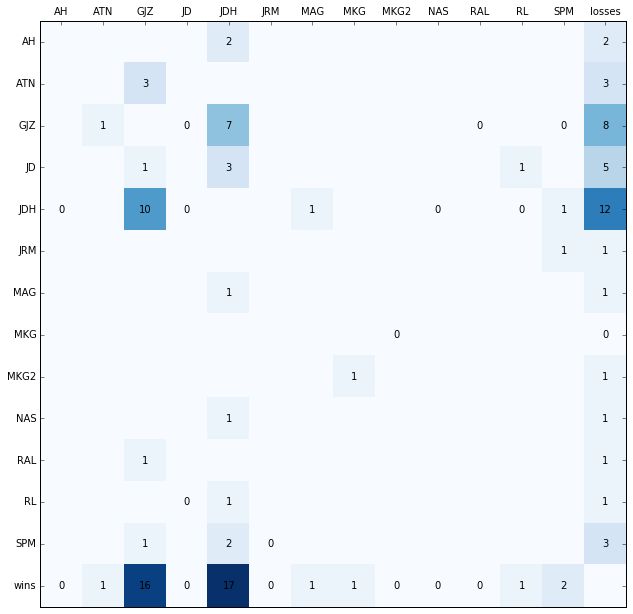

In [75]:
scale = 0.75
fig, ax = plt.subplots(figsize = (scale * games_h2h.shape[1], scale * games_h2h.shape[0]))
heatmap = ax.pcolor(games_h2h, cmap = "Blues")

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(games_h2h.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(games_h2h.shape[0])+0.5, minor=False)

ax.set_xticklabels(games_h2h.columns)
ax.set_yticklabels(games_h2h.index.values)

ax.invert_yaxis()
ax.xaxis.tick_top()

for y in range(games_h2h.shape[0]):
    for x in range(games_h2h.shape[1]):
        val = games_h2h.iloc[y, x]
        opp_val = games_h2h.iloc[x, y]
        if val or opp_val:
            plt.text(x + 0.5, y + 0.5, '%.1d' % val,
                     horizontalalignment='center',
                     verticalalignment='center',
                     )

In [76]:
print list(games_h2h.index.values)
print list(games_h2h.columns)

['AH', 'ATN', 'GJZ', 'JD', 'JDH', 'JRM', 'MAG', 'MKG', 'MKG2', 'NAS', 'RAL', 'RL', 'SPM', 'wins']
['AH', 'ATN', 'GJZ', 'JD', 'JDH', 'JRM', 'MAG', 'MKG', 'MKG2', 'NAS', 'RAL', 'RL', 'SPM', 'losses']


GZ stats

In [19]:
gz_games = df_games[((df_games.player1 == 'GJZ') | (df_games.player2 == 'GJZ'))]

In [20]:
print len(gz_games[gz_games.winner == 'GJZ']) / float(len(gz_games))

0.666666666667


### Elo Rating Algo \#1: Simple

#### System 1a: Dictionary of ratings

Giving players Elo ratings. 538 uses average $= 1500$ and $K = 20$ (see [here](https://fivethirtyeight.com/features/how-we-calculate-nba-elo-ratings/)).

In [31]:
init_avg = 1500.
sel_k = 20.
exp_div = 400.

Helper functions

In [32]:
def p_win_exp(p1, p2, div=exp_div):
    p_win = 1. / (1. + 10. ** ((p2 - p1) / div))
    
    #print 'P(win)', '%.2f' % p_win 
    return p_win

In [33]:
def new_score(p1r, p2r, score=1, k=sel_k):
    # if p1 wins, score is 1
    # if p1 loses, score is -1
    delta = k * (score - p_win_exp(p1r, p2r))
    
    #print 'Point delta', '%.2f' % delta
    return p1r + delta, p2r - delta

Create dictionary of player scores

In [34]:
player_scores = dict(zip(all_players, list(init_avg * np.ones(len(all_players)))))

Iterate through game data

In [35]:
for idx, row in df_games.iterrows():
    
    winner = row['winner']
    loser = row['loser']
    
    old1 = player_scores[winner]
    old2 = player_scores[loser]
    
    player_scores[winner], player_scores[loser] = new_score(player_scores[winner], player_scores[loser])
    
#     print winner + ' (winner):',  '%.0f' % old1, '-->', '%.0f' % player_scores[winner]
#     print loser + ' (loser):', '%.0f' % old2, '-->', '%.0f' % player_scores[loser]
#     print "===="

In [36]:
player_scores

{'AH': 1480.4302182246715,
 'ATN': 1486.9602599925413,
 'GJZ': 1555.0638997297767,
 'JD': 1452.5865759989517,
 'JDH': 1563.5304204438924,
 'JRM': 1490.0,
 'MAG': 1500.7402567645654,
 'MKG': 1510.0,
 'MKG2': 1490.0,
 'NAS': 1491.3389493914003,
 'RAL': 1491.1486041010212,
 'RL': 1499.4016573765102,
 'SPM': 1488.7991579766692}

#### System 1b: DataFrame for dict

**Caution:** uses same DataFrame name as later Elo rating systems!

In [ ]:
init_avg = 1500.
sel_k = 20.
exp_div = 400.

kbase = 800.
denom_const = kbase / 40.

In [92]:
seq_info = pd.DataFrame(games_h2h.index)
seq_info.columns = ['player']

seq_info['simple_elo'] = 1500.
seq_info['elo2'] = 1500.
seq_info['num_wins'] = 0.
seq_info['tot_games'] = 0.
seq_info = seq_info[seq_info.player != 'wins']

In [93]:
seq_info.set_index('player', inplace=True, drop=True)
seq_info.index.name = None

In [94]:
for idx, row in df_games.iterrows():
    winner = row['winner']
    loser = row['loser']
    
    # update game counts and victories
    seq_info.loc[winner]['num_wins'] += 1
    seq_info.loc[winner]['tot_games'] += 1
    seq_info.loc[loser]['num_wins'] += 1
    
    (seq_info.loc[winner]['elo'], seq_info.loc[loser]['elo']) \
        = new_score(seq_info.loc[winner]['elo'], seq_info.loc[loser]['elo'])

In [95]:
seq_info

,elo,num_wins,tot_games
AH,1480.430218,2.0,0.0
ATN,1486.960260,4.0,1.0
GJZ,1555.063900,24.0,16.0
JD,1452.586576,5.0,0.0
JDH,1563.530420,29.0,17.0
JRM,1490.000000,1.0,0.0
MAG,1500.740257,2.0,1.0
MKG,1510.000000,1.0,1.0
MKG2,1490.000000,1.0,0.0
NAS,1491.338949,1.0,0.0


### Elo Rating Algo \#2: Adjusted K-factor

Diminishing adjustment for greater horizons (i.e. greater number of games played).

Using a variable $K$-factor depending on number of games played by the player

In [104]:
avg_elo = 1500.
kbase = 800.
denom_const = kbase / 40.

In [105]:
seq_info = pd.DataFrame(games_h2h.index)
seq_info.columns = ['player']

seq_info['elo'] = 1500.
seq_info['num_wins'] = 0.
seq_info['tot_games'] = 0.
seq_info = seq_info[seq_info.player != 'wins']

In [106]:
seq_info.set_index('player', inplace=True, drop=True)
seq_info.index.name = None

In [107]:
def new_score_kadj(p1r, p2r, g1, g2, kbase=kbase, score=1):
    # if p1 wins, score is 1
    # if p1 loses, score is -1
    const = (score - p_win_exp(p1r, p2r))
    delta1 = (kbase / (denom_const + g1)) * const
    delta2 = (kbase / (denom_const + g2)) * const
    print delta1, g1
    print delta2, g2
    return p1r + delta1, p2r - delta2

Iterate through games to obtain Elo rankings. 

Code below has an issue when not all dtypes are ints--make sure to have all numbers as floats.

In [108]:
for idx, row in df_games.iterrows():
    winner = row['winner']
    loser = row['loser']
    
    g1 = seq_info.loc[winner]['tot_games']
    g2 = seq_info.loc[loser]['tot_games']
    
#     print winner, seq_info.loc[winner]['elo']
#     print loser, seq_info.loc[loser]['elo']
    
    (seq_info.loc[winner]['elo'], seq_info.loc[loser]['elo']) = new_score_kadj(seq_info.loc[winner]['elo'],
                                                                               seq_info.loc[loser]['elo'],
                                                                               g1, g2)

#     print winner, seq_info.loc[winner]['elo']
#     print loser, seq_info.loc[loser]['elo']
#     print '===='

    seq_info.loc[winner]['tot_games'] += 1
    seq_info.loc[loser]['tot_games'] += 1
    
    seq_info.loc[winner]['num_wins'] += 1

20.0 0.0
20.0 0.0
17.9523594708 1.0
18.8499774443 0.0
18.9159714994 0.0
18.0152109518 1.0
17.8857975385 0.0
16.2598159441 2.0
18.0116035959 1.0
18.9121837757 0.0
21.8486550807 3.0
22.8417757662 2.0
17.2595318957 4.0
19.7251793093 1.0
20.0 0.0
20.0 0.0
17.0416010277 2.0
16.3006618526 3.0
14.0309645565 3.0
12.908487392 5.0
19.4864012288 6.0
21.1102679979 4.0
13.4880621281 7.0
16.5535307936 2.0
11.793428218 8.0
14.3572169611 3.0
13.8536570556 5.0
17.3170713195 0.0
16.0491194121 0.0
13.3742661767 4.0
13.4945372023 6.0
12.0985505952 9.0
11.9314548622 7.0
10.738309376 10.0
10.6209988586 8.0
9.59316025941 11.0
13.0245169307 12.0
20.8392270891 0.0
15.4637204284 13.0
17.5966473841 9.0
9.7220007346 10.0
13.888572478 1.0
10.1597798417 11.0
9.26332867924 14.0
14.4607179407 15.0
15.8164102476 12.0
9.9078870881 13.0
9.08222983076 16.0
10.4622443193 17.0
16.1292933255 4.0
9.33864095732 14.0
8.35562611971 18.0
12.8659483663 19.0
14.3363424653 15.0
8.68856790991 20.0
16.5496531617 1.0
9.26152285102 21.

In [103]:
seq_info

,elo,num_wins,tot_games
AH,1147.859533,0.0,2.0
ATN,1508.365125,1.0,4.0
GJZ,1728.614944,16.0,24.0
JD,1138.356774,0.0,5.0
JDH,1737.762732,17.0,29.0
JRM,1100.000000,0.0,1.0
MAG,1500.812656,1.0,2.0
MKG,1900.000000,1.0,1.0
MKG2,1100.000000,0.0,1.0
NAS,1324.314573,0.0,1.0
